In [1]:
# importing the required libraries
import pandas as pd
import warnings
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,accuracy_score,r2_score,confusion_matrix

In [2]:
warnings.filterwarnings('ignore')

In [3]:
hr=pd.read_csv('C:\\Users\\Dell\\OneDrive\\Desktop\\WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [4]:
hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
# getting information about the data
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
hr.describe(include='all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


#  Exploratory Data Analysis

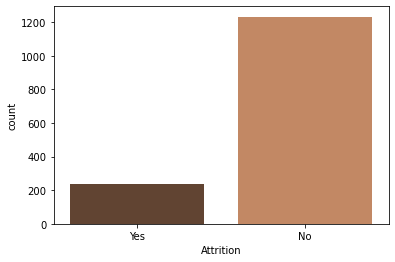

In [7]:
sns.countplot(x='Attrition',data=hr,palette='copper')
plt.show()

There is class Imbalance in the data

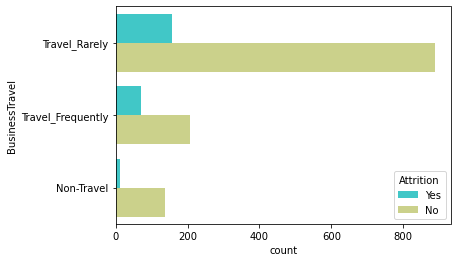

In [8]:
sns.countplot(y='BusinessTravel',hue='Attrition',data=hr,palette='rainbow')
plt.show()

Attrition of 'No' is high in case of travel rarely

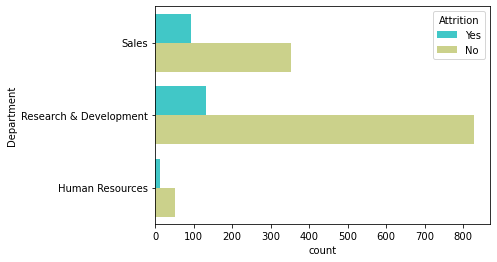

In [9]:
sns.countplot(y='Department',hue='Attrition',data=hr,palette='rainbow')
plt.show()

Attrition of "No" is high in Research & Development Department

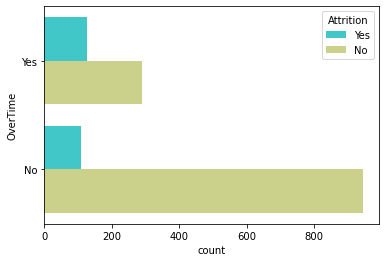

In [10]:
sns.countplot(y='OverTime',hue='Attrition',data=hr,palette='rainbow')
plt.show()

Attrition of "No" is high if Overtime is done

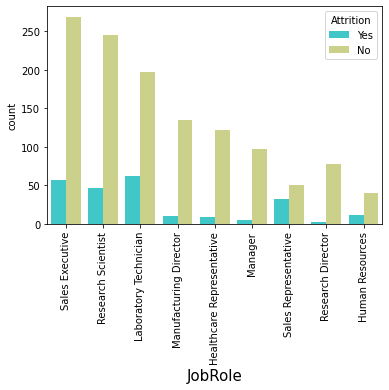

In [11]:
sns.countplot(x='JobRole', hue='Attrition', palette = 'rainbow', data=hr)
plt.xticks(rotation=90)
plt.xlabel('JobRole',size=15)
plt.show()

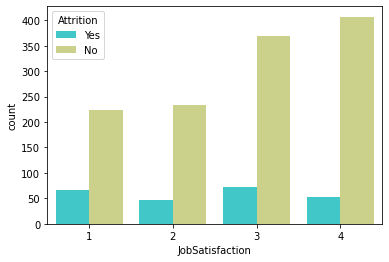

In [12]:
sns.countplot(x='JobSatisfaction',hue='Attrition',data=hr,palette='rainbow')
plt.show()

Higher the satisfaction lesser the chances of attrition 

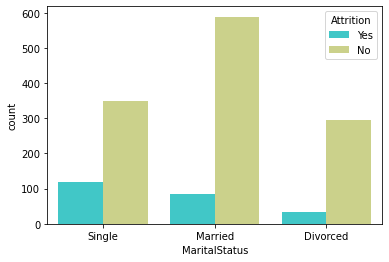

In [13]:
sns.countplot(x='MaritalStatus', hue='Attrition', palette = 'rainbow', data=hr)
plt.show()

Singles tend to leave the job more frequent

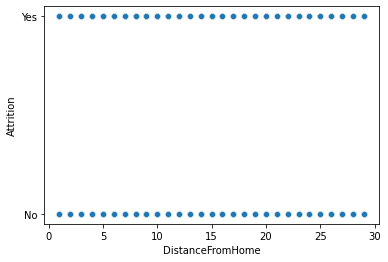

In [14]:
sns.scatterplot(x='DistanceFromHome',y='Attrition', data=hr)
plt.show()

The relationship is almost same for both the attrition

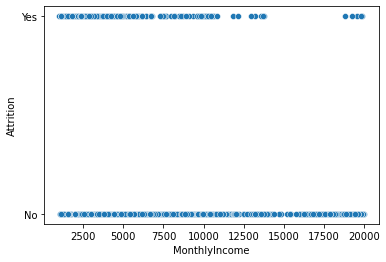

In [15]:
sns.scatterplot(x='MonthlyIncome',y='Attrition', data=hr)
plt.show()

People having mothly income between 15000-18500 tend to stay with the company.

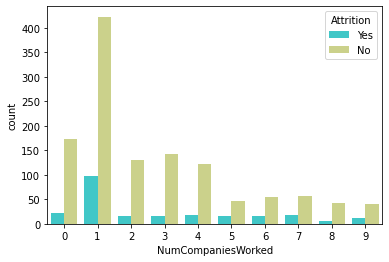

In [16]:
sns.countplot(x='NumCompaniesWorked',hue='Attrition', palette = 'rainbow', data=hr)
plt.show()

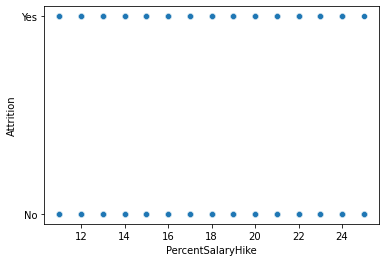

In [17]:
sns.scatterplot(x='PercentSalaryHike',y='Attrition', data=hr)
plt.show()

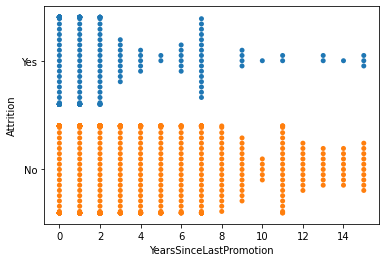

In [18]:
sns.swarmplot(x='YearsSinceLastPromotion',y='Attrition', data=hr)
plt.show()

The longer the duration since last promotion the atrrition is lesser

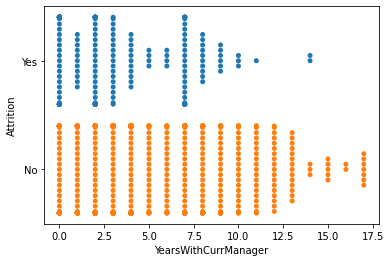

In [19]:
sns.swarmplot(x='YearsWithCurrManager',y='Attrition', data=hr)
plt.show()

longer years with current manager makes less attrition

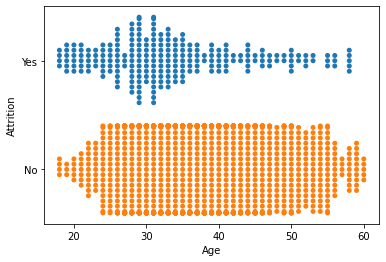

In [20]:
sns.swarmplot(x='Age',y='Attrition', data=hr)
plt.show()

people having younger age tend to leave the job

In [21]:
hr.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [22]:
#Separating the categorical and numeric columns so as analyze the data neatly
Categorical_columns=pd.DataFrame()
integer_columns=pd.DataFrame()
for i in hr.columns:
    if hr[i].dtype==object:
        Categorical_columns[str(i)]=hr[i]    
    elif hr[i].dtype=='int64':
        integer_columns[str(i)]=hr[i] 

In [23]:
Categorical_columns.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [24]:
integer_columns.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2


In [25]:
Categorical_columns.describe()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [26]:
#Converting the categorical values to numeric 
le=LabelEncoder()
list_=["Attrition","BusinessTravel","Department","EducationField",'Gender','MaritalStatus','JobRole','Over18','OverTime']
for i in list_:
    Categorical_columns[i]=le.fit_transform((Categorical_columns[i].astype(str)))

In [27]:
Categorical_columns.dtypes

Attrition         int32
BusinessTravel    int32
Department        int32
EducationField    int32
Gender            int32
JobRole           int32
MaritalStatus     int32
Over18            int32
OverTime          int32
dtype: object

In [28]:
#rejoining the columns
hr_new=pd.concat([Categorical_columns,integer_columns],axis=1)

In [29]:
hr_new.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime,Age,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,2,2,1,0,7,2,0,1,41,...,1,80,0,8,0,1,6,4,0,5
1,0,1,1,1,1,6,1,0,0,49,...,4,80,1,10,3,3,10,7,1,7
2,1,2,1,4,1,2,2,0,1,37,...,2,80,0,7,3,3,0,0,0,0
3,0,1,1,1,0,6,1,0,1,33,...,3,80,0,8,3,3,8,7,3,0
4,0,2,1,3,1,2,1,0,0,27,...,4,80,1,6,3,3,2,2,2,2


In [30]:
hr_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Attrition                 1470 non-null   int32
 1   BusinessTravel            1470 non-null   int32
 2   Department                1470 non-null   int32
 3   EducationField            1470 non-null   int32
 4   Gender                    1470 non-null   int32
 5   JobRole                   1470 non-null   int32
 6   MaritalStatus             1470 non-null   int32
 7   Over18                    1470 non-null   int32
 8   OverTime                  1470 non-null   int32
 9   Age                       1470 non-null   int64
 10  DailyRate                 1470 non-null   int64
 11  DistanceFromHome          1470 non-null   int64
 12  Education                 1470 non-null   int64
 13  EmployeeCount             1470 non-null   int64
 14  EmployeeNumber            1470 non-null 

<AxesSubplot:xlabel='Gender', ylabel='WorkLifeBalance'>

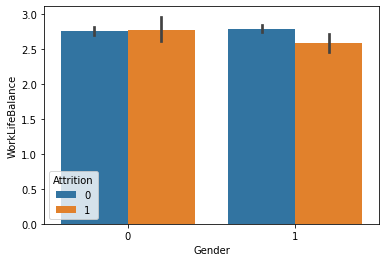

In [31]:
sns.barplot(x='Gender',y='WorkLifeBalance',hue="Attrition",data=hr_new)

In [32]:
hr_new.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'],axis=1,inplace=True)
#These columns are either constant or do not affect our target variable

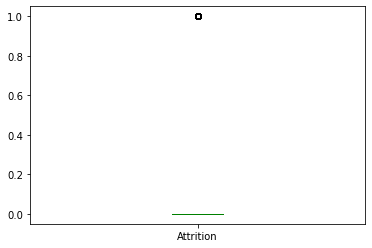

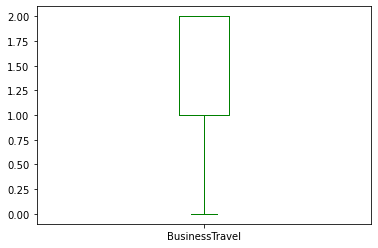

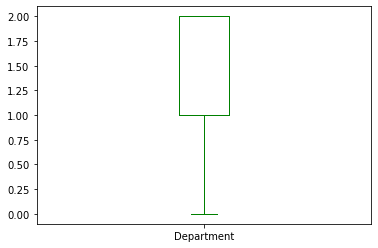

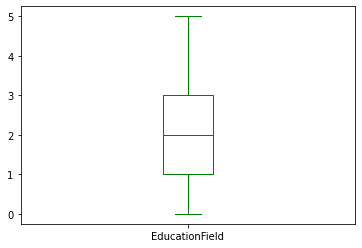

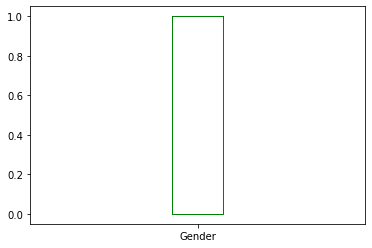

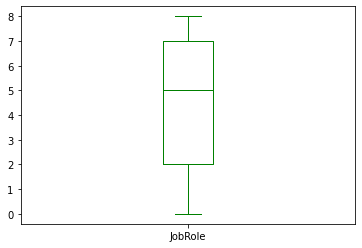

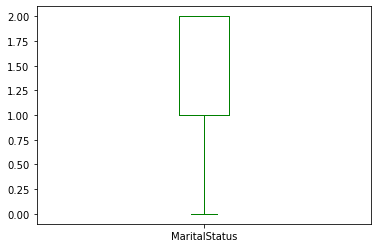

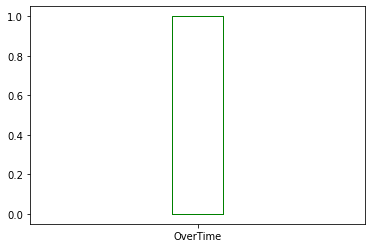

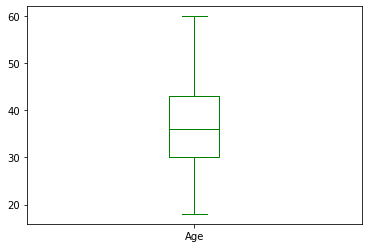

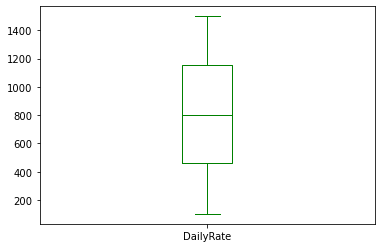

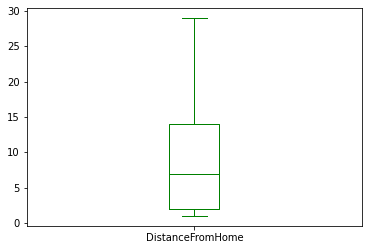

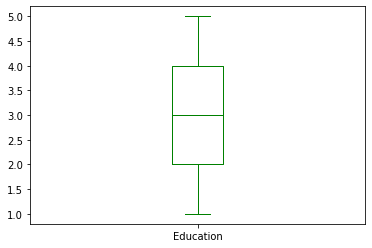

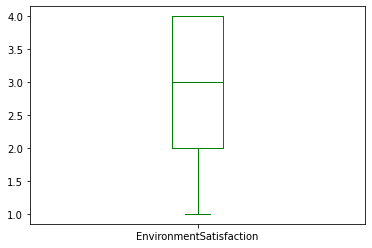

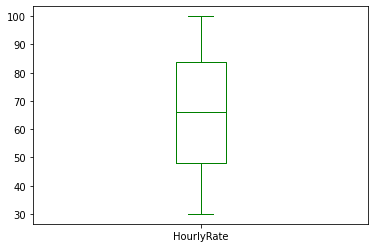

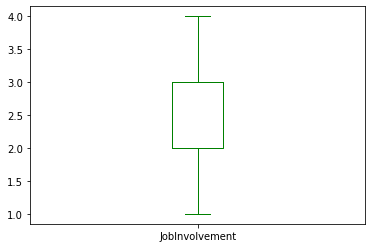

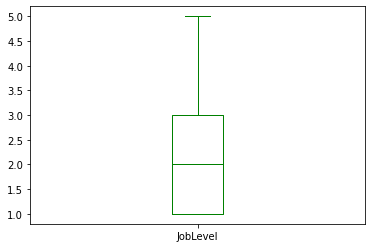

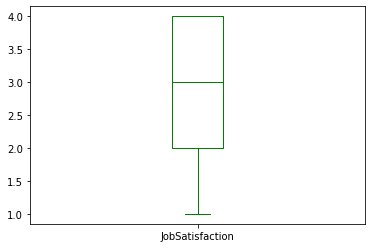

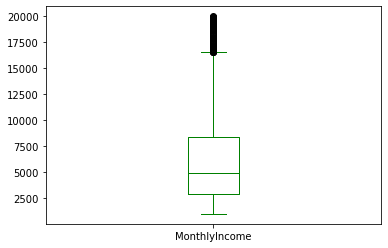

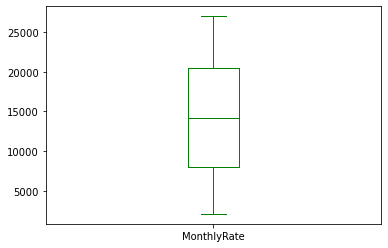

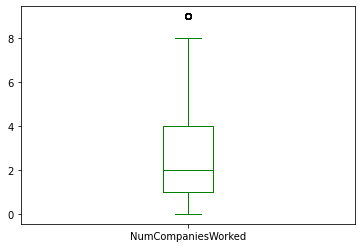

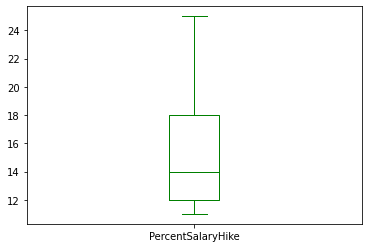

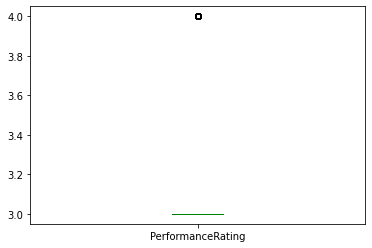

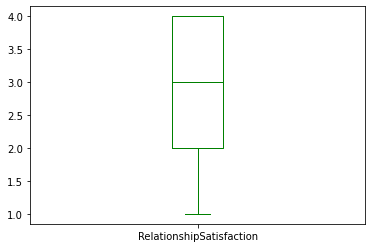

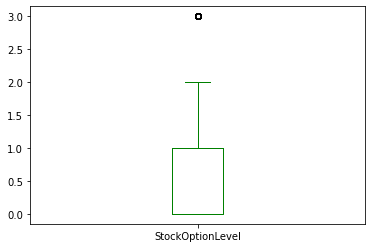

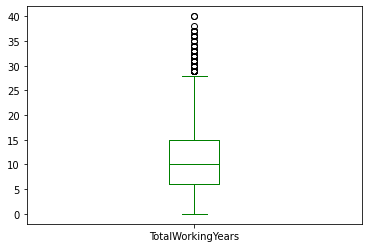

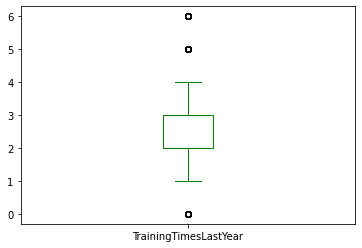

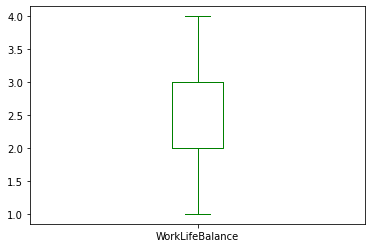

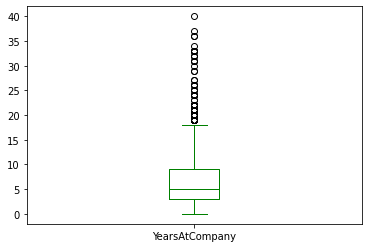

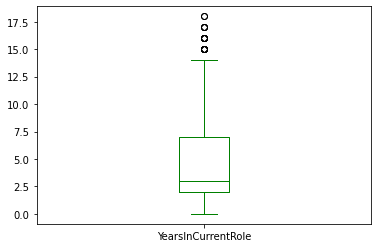

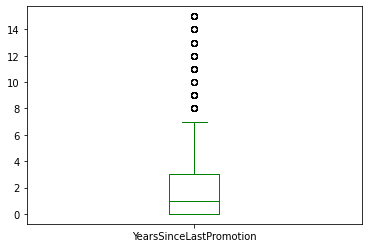

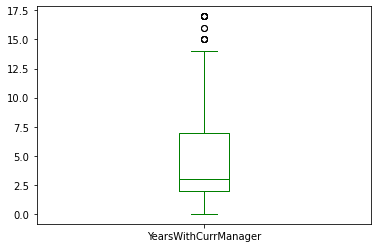

In [33]:
for i in hr_new.columns:
    hr_new[i].plot(kind='box',color='green')
    plt.show()

Some Columns have outliers  
like  the **Monthly Income** column,**Years with current manager**, **years since  last promotion**  etc.

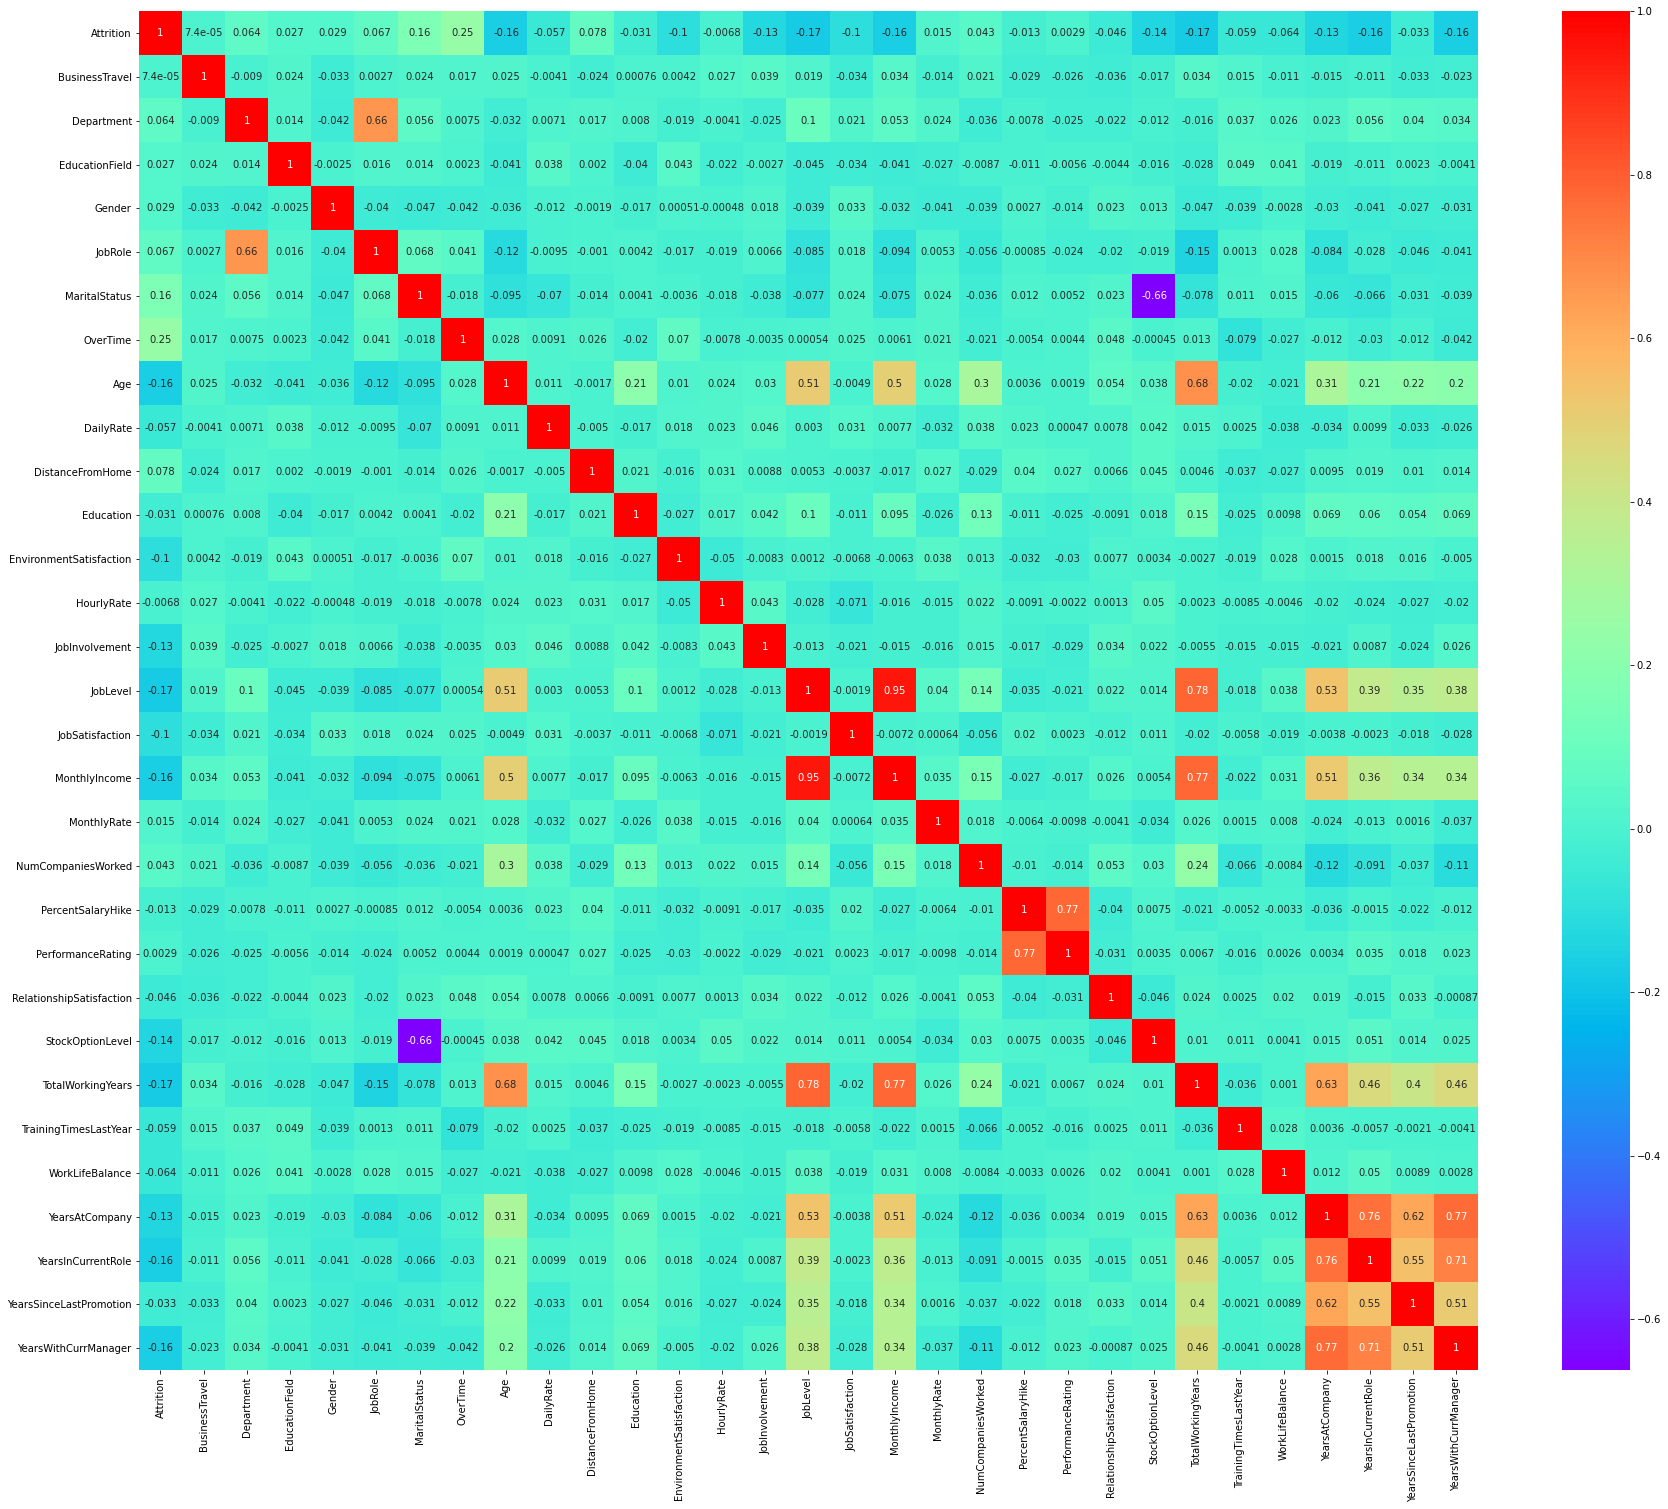

In [34]:
plt.figure(figsize=(30,25))
sns.heatmap(hr_new.corr(),annot=True,cmap="rainbow")
plt.show()

Separating the data into features and vectors

In [82]:
x=hr_new.iloc[:,1:]
y=hr_new.iloc[:,0]

In [83]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=35)
xtrain.shape

(1029, 30)

**Handling Class Imbalance**

In [84]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
oversampled_xtrain, oversampled_ytrain = sm.fit_resample(xtrain,ytrain)

In [85]:
oversampled_xtrain.shape,oversampled_ytrain.shape

((1702, 30), (1702,))

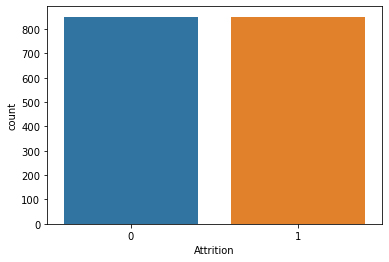

In [86]:
sns.countplot(pd.Series(oversampled_ytrain))
plt.show()

Problem of class imbalance is solved 

# Developing the model

**Logistic Regression**

In [87]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight='balanced')
lr.fit(oversampled_xtrain,oversampled_ytrain)
pred=lr.predict(xtest)
print(accuracy_score(pred,ytest)*100,'%','\n\n')
print(classification_report(pred,ytest),'\n\n')
print(confusion_matrix(pred,ytest))

69.61451247165533 % 


              precision    recall  f1-score   support

           0       0.72      0.91      0.80       300
           1       0.56      0.23      0.33       141

    accuracy                           0.70       441
   macro avg       0.64      0.57      0.57       441
weighted avg       0.67      0.70      0.65       441
 


[[274  26]
 [108  33]]


**MultinomialNB**

In [88]:
from sklearn.naive_bayes import MultinomialNB
mn = MultinomialNB()
mn.fit(oversampled_xtrain,oversampled_ytrain)
pred1=mn.predict(xtest)
print(accuracy_score(pred1,ytest)*100,'%','\n\n')
print(classification_report(pred1,ytest),'\n\n')
print(confusion_matrix(pred1,ytest))

51.47392290249433 % 


              precision    recall  f1-score   support

           0       0.50      0.89      0.64       214
           1       0.61      0.16      0.25       227

    accuracy                           0.51       441
   macro avg       0.56      0.53      0.45       441
weighted avg       0.56      0.51      0.44       441
 


[[191  23]
 [191  36]]


**DecisionTreeClassifier**

In [89]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(oversampled_xtrain,oversampled_ytrain)
pred2=dt.predict(xtest)
print(accuracy_score(pred2,ytest)*100,'%','\n\n')
print(classification_report(pred2,ytest),'\n\n')
print(confusion_matrix(pred2,ytest))

74.14965986394559 % 


              precision    recall  f1-score   support

           0       0.80      0.89      0.84       342
           1       0.37      0.22      0.28        99

    accuracy                           0.74       441
   macro avg       0.59      0.56      0.56       441
weighted avg       0.70      0.74      0.72       441
 


[[305  37]
 [ 77  22]]


**RandomForestClassifier**

In [90]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(oversampled_xtrain,oversampled_ytrain)
pred3=rfc.predict(xtest)
print(accuracy_score(pred3,ytest)*100,'%','\n\n')
print(classification_report(pred3,ytest),'\n\n')
print(confusion_matrix(pred3,ytest))

85.26077097505669 % 


              precision    recall  f1-score   support

           0       0.93      0.91      0.92       391
           1       0.37      0.44      0.40        50

    accuracy                           0.85       441
   macro avg       0.65      0.67      0.66       441
weighted avg       0.86      0.85      0.86       441
 


[[354  37]
 [ 28  22]]


**ROC AUC curve**

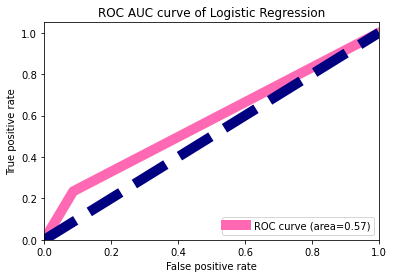

In [91]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred,ytest)
roc_auc= auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='hotpink',lw=10,label='ROC curve (area=%0.2f)'% roc_auc)
plt.plot([0,1],[0,1],color="navy",lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC AUC curve of Logistic Regression')
plt.legend(loc="lower right")
plt.show()

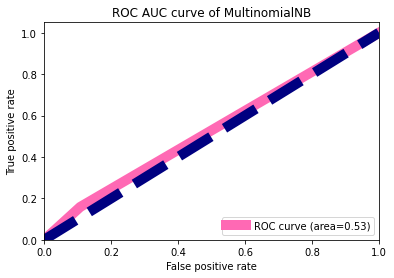

In [92]:
fpr,tpr,thresholds=roc_curve(pred1,ytest)
roc_auc= auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='hotpink',lw=10,label='ROC curve (area=%0.2f)'% roc_auc)
plt.plot([0,1],[0,1],color="navy",lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC AUC curve of MultinomialNB')
plt.legend(loc="lower right")
plt.show()

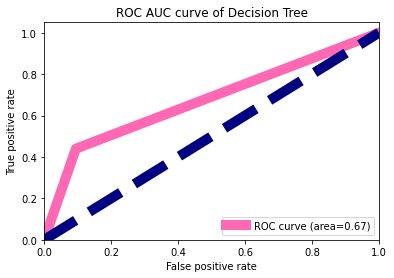

In [93]:
fpr,tpr,thresholds=roc_curve(pred3,ytest)
roc_auc= auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='hotpink',lw=10,label='ROC curve (area=%0.2f)'% roc_auc)
plt.plot([0,1],[0,1],color="navy",lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC AUC curve of Decision Tree')
plt.legend(loc="lower right")
plt.show()

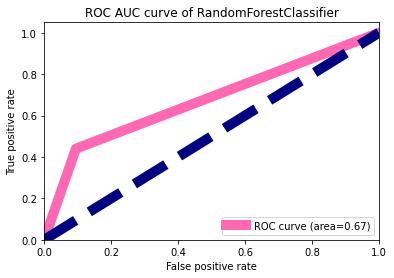

In [94]:
fpr,tpr,thresholds=roc_curve(pred3,ytest)
roc_auc= auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='hotpink',lw=10,label='ROC curve (area=%0.2f)'% roc_auc)
plt.plot([0,1],[0,1],color="navy",lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC AUC curve of RandomForestClassifier')
plt.legend(loc="lower right")
plt.show()

In [95]:
from sklearn.model_selection import cross_val_score
lsscore=cross_val_score(lr,x,y,cv=5)
lsc=lsscore.mean()
print('Cross validation score using logistic regression is: ',lsc*100)
print('accuracy_score is:-',accuracy_score(pred,ytest)*100)

Cross validation score using logistic regression is:  62.925170068027214
accuracy_score is:- 69.61451247165533


In [96]:
lsscore=cross_val_score(mn,x,y,cv=5)
lsc=lsscore.mean()
print('Cross validation score MultinomialNB is: ',lsc*100)
print('accuracy_score is:',accuracy_score(pred1,ytest)*100)

Cross validation score MultinomialNB is:  52.925170068027214
accuracy_score is: 51.47392290249433


In [97]:
lsscore=cross_val_score(dt,x,y,cv=5)
lsc=lsscore.mean()
print('Cross validation score DecisionTreeClassifier is: ',lsc*100)
print('accuracy_score is:',accuracy_score(pred2,ytest)*100)

Cross validation score DecisionTreeClassifier is:  77.55102040816327
accuracy_score is: 74.14965986394559


In [98]:
lsscore=cross_val_score(rfc,x,y,cv=5)
lsc=lsscore.mean()
print('Cross validation score RandomForestClassifier is: ',lsc*100)
print('accuracy_score is:',accuracy_score(pred2,ytest)*100)

Cross validation score RandomForestClassifier is:  86.3265306122449
accuracy_score is: 74.14965986394559


We are getting the best accuracy score with RandomForestClassifier and DecisionTreeClassifier

In [99]:
Conclusion_Decisiontree=pd.DataFrame()
Conclusion_Decisiontree['Actual Values']=ytest
Conclusion_Decisiontree['Predicted Values']=pred2
Conclusion_Decisiontree

,Actual Values,Predicted Values
979,0,0
456,0,0
78,0,0
1424,0,0
601,0,1
...,...,...
116,0,0
1300,0,0
891,0,0
680,0,0


In [100]:
Conclusion_RandonForest=pd.DataFrame()
Conclusion_RandonForest['Actual Values']=ytest
Conclusion_RandonForest['Predicted Values']=pred3
Conclusion_RandonForest

,Actual Values,Predicted Values
979,0,0
456,0,0
78,0,0
1424,0,0
601,0,0
...,...,...
116,0,0
1300,0,0
891,0,0
680,0,0


In [104]:
from sklearn.metrics import mean_squared_error
print('Mean Squared error of DecisionTreeClassifier is:',mean_squared_error(ytest,pred2))
print('Mean Squared error of RandomForestClassifier is:',mean_squared_error(ytest,pred3))

Mean Squared error of DecisionTreeClassifier is: 0.2585034013605442
Mean Squared error of RandomForestClassifier is: 0.1473922902494331


Saving RandomForest as The model

In [105]:
import pickle
filename='HrAnalytics.pkl'
pickle.dump(rfc,open(filename,'wb'))

# Coclusion

In [107]:
print(accuracy_score(rfc.predict(xtrain),ytrain)*100,"%")

100.0 %
